In [1]:
import numpy as np
import matplotlib.pyplot as plt

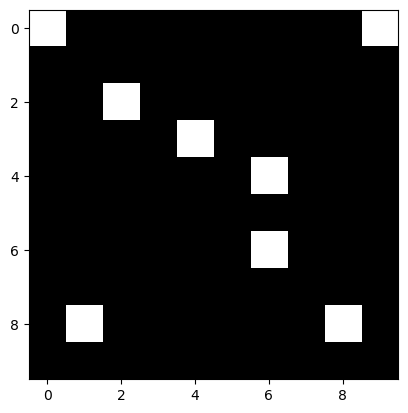

In [2]:
img = np.diag(np.full(10,1))  
img[[1,1]] = 0
img[[-1,-1]] = 0
img[[5,5]] = 0
img[[4,4]] = 0
img[[3,3]] = 0
img[[7,7]] = 0
img[4,6] = 1
img[3,4] = 1
img[0,9] = 1
img[8,1] = 1
# np.diag(np.full(5,0))+np.diag(np.ones(4),1)+np.diag(np.ones(2),-3)   
# np.diag(np.full(128,-2))+np.diag(np.ones(127),1) #+np.diag(np.ones(127),1)   
plt.imshow(img, cmap = "gray")


255

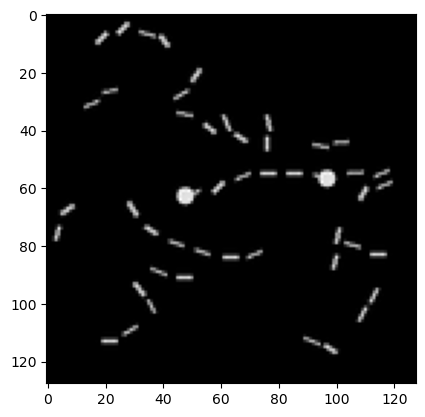

In [25]:
path128 = "/home/data/pathgx/lra_release/pathfinder128/curv_baseline/imgs/1/sample_0.png"

from PIL import Image
import numpy as np

im_frame = Image.open(path128)
img = np.array(im_frame)
plt.imshow(img, cmap="gray")

np.max(img)

[[[96.5 56.5  3.3]
  [47.5 62.5  3.3]]]


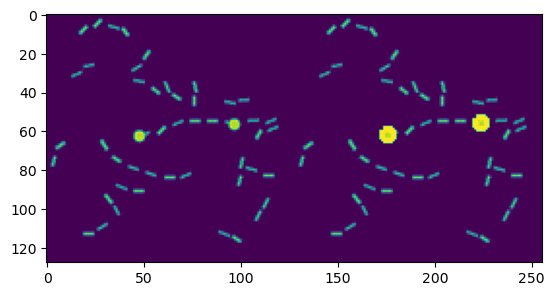

In [97]:
import cv2
gray = img.copy()
output = img.copy()

# detect circles in the image
circles = cv2.HoughCircles(gray.astype('uint8'), cv2.HOUGH_GRADIENT,1,20, minRadius=2, maxRadius=4, param1=20, param2=5)
print(circles)


# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, 255, 2)
		# cv2.rectangle(output, (x - 1, y - 1), (x + 1, y + 1), 0, -1)
	# show the output image\
	new = np.hstack([img, output])
	plt.imshow(new)
	# cv2.imshow("output", )
	# cv2.waitKey(0)

In [103]:
circles

array([[96, 56,  3],
       [48, 62,  3]])

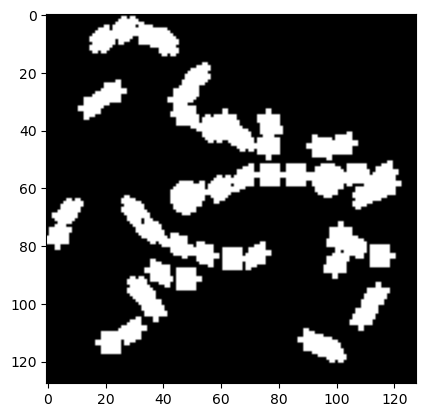

In [4]:
import cv2
# kernel = np.ones((3, 3), np.uint8)
kernel1 = np.ones((2, 2), np.uint8)
img_dilation1 = cv2.dilate(img.astype('uint8'), kernel1, iterations=1)
img_dilation1[img_dilation1 > 0] = 1
# kernel2 = np.ones((1, 1), np.uint8)
# img_dilation2 = cv2.dilate(img_dilation1.astype('uint8'), kernel2, iterations=1)

plt.imshow(img_dilation1, cmap="gray")
# plt.imshow(img_dilation2, cmap="gray")

# opening = cv2.morphologyEx(img.astype('uint8'), cv2.MORPH_OPEN, kernel)
# plt.imshow(opening)

In [114]:
img_dilation1[96:100,56:60]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [98]:
def construct_nodes(image):
    #CONSTRUCTION OF HORIZONTAL EDGES
    hx, hy = np.where(image[1:] & image[:-1]) #horizontal edge start positions
    h_units = np.array([hx, hy]).T
    h_starts = [tuple(n) for n in h_units]
    h_ends = [tuple(n) for n in h_units + (1, 0)] #end positions = start positions shifted by vector (1,0)
    horizontal_edges = zip(h_starts, h_ends)

    #CONSTRUCTION OF VERTICAL EDGES
    vx, vy = np.where(image[:,1:] & image[:,:-1]) #vertical edge start positions
    v_units = np.array([vx, vy]).T
    v_starts = [tuple(n) for n in v_units]
    v_ends = [tuple(n) for n in v_units + (0, 1)] #end positions = start positions shifted by vector (0,1)
    vertical_edges = zip(v_starts, v_ends)

    return horizontal_edges, vertical_edges

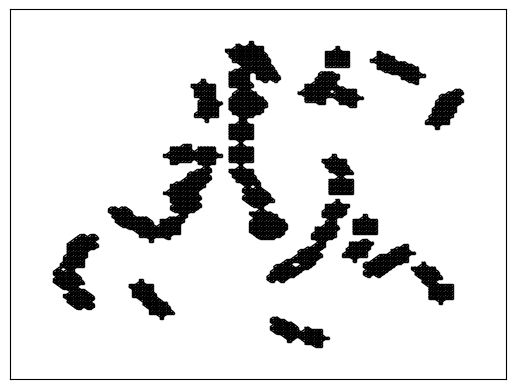

In [107]:
import networkx as nx
G = nx.Graph()
horizontal_edges, vertical_edges = construct_nodes(img_dilation1)
G.add_edges_from(horizontal_edges)
G.add_edges_from(vertical_edges)

# get diagonals
nodes = list(G.nodes)
for n in nodes:
    upR = (n[0]+1, n[1]+1)
    downR = (n[0]-1, n[1]+1)
    upL = (n[0]+1, n[1]-1)
    downL = (n[0]-1, n[1]-1)
    if upR in nodes:
        G.add_edge(n,upR)
    if downR in nodes:
        G.add_edge(n,downR)
    if upL in nodes:
        G.add_edge(n,upL)
    if downL in nodes:
        G.add_edge(n,downL)

pos = dict(zip(G.nodes(), G.nodes())) # map node names to coordinates
nx.draw_networkx(G, pos, with_labels=False, node_size=0)
# labels={node: f'({node[0]},{node[1]})' for node in G.nodes()}
# nx.draw_networkx_labels(G, pos, labels, font_size=6, font_family='serif', font_weight='bold', bbox = dict(fc='lightblue', ec="black", boxstyle="round", lw=1))
plt.show()

In [108]:
def bfs1(graph, source):
    visited = set() # to keep track of already visited nodes
    bfs_traversal = list()  # the BFS traversal result
    queue = list()  # queue
    
    # push the root node to the queue and mark it as visited
    queue.append(source)
    visited.add(source)
    
    # loop until the queue is empty
    while queue:
        # pop the front node of the queue and add it to bfs_traversal
        current_node = queue.pop(0)
        bfs_traversal.append(current_node)
        
        # check all the neighbour nodes of the current node
        for neighbour_node in graph[current_node]:
            # if the neighbour nodes are not already visited, 
            # push them to the queue and mark them as visited
            if neighbour_node not in visited:
                visited.add(neighbour_node)
                queue.append(neighbour_node)

    return bfs_traversal
  

def bfs2(Adj, s):  # Adj: adjacency list, s: starting vertex
    parent = [None for v in Adj]  # O(V) (use hash if unlabeled)
    parent[s] = s  # O(1) root
    dist = [None for v in Adj]
    dist[s] = 0
    levels = [[s]]  # O(1) initialize levels
    while levels[-1]:  # O(?) last level contains vertices
        frontier = []  # O(1), make new level
        for u in levels[-1]:  # O(?) loop over last full level
            for v in Adj[u]:  # O(Adj[u]) loop over neighbors
                if parent[v] is None:  # O(1) parent not yet assigned
                    parent[v] = u  # O(1) assign parent from levels[-1]
                    dist[v] = dist[u] + 1
                    frontier.append(v)  # O(1) amortized, add to border
        levels.append(frontier)  # add the new level to levels
    return parent, dist

In [109]:
import heapq
from math import inf

def dijkstra(adj, start, target):
    d = {start: 0}
    parent = {start: None}
    pq = [(0, start)]
    visited = set()
    while pq:
        du, u = heapq.heappop(pq)
        if u in visited: 
            continue
        if u == target:
            break
        visited.add(u)
        weight = 1 # all weighted evenly
        for v in adj[u]:
            if v not in d or d[v] > du + weight:
                d[v] = du + weight
                parent[v] = u
                heapq.heappush(pq, (d[v], v))

    return parent, d

In [119]:
def path(node, parent):
    path = []
    while node:
        path.append(node)
        node = parent[node]
    
    return path

In [110]:
len(circles)

2

In [130]:
adj = [(n, nbrdict) for n, nbrdict in G.adjacency()]
adj_dict = {}
for el in adj:
    adj_dict[el[0]] = [key for key in el[1].keys()]



num_circles = len(circles)
if num_circles != 2:
    print("error! more than 2 circles detected. shift parameters")

anchors = []
for i in range(num_circles):
    if circles[i][2] > 5:
        print("have big radii detected, may need to fix hough")
    anchors.append((circles[i][1], circles[i][0])) # swap coords

# parent, d = dijkstra(adj_dict, anchors[0], anchors[1])
path = nx.dijkstra_path(G, anchors[0], anchors[1])
print(anchors)
print(path)
# traversal1 = bfs1(adj_dict, (0,0))
# parent, d = dijkstra(adj_dict, (0,0), (9,9))


[(56, 96), (62, 48)]
[(56, 96), (56, 95), (56, 94), (56, 93), (56, 92), (56, 91), (56, 90), (56, 89), (56, 88), (56, 87), (56, 86), (56, 85), (56, 84), (56, 83), (56, 82), (56, 81), (56, 80), (56, 79), (56, 78), (56, 77), (56, 76), (56, 75), (56, 74), (56, 73), (56, 72), (56, 71), (56, 70), (56, 69), (56, 68), (56, 67), (56, 66), (56, 65), (57, 64), (57, 63), (57, 62), (57, 61), (57, 60), (57, 59), (58, 58), (59, 57), (60, 56), (61, 55), (61, 54), (61, 53), (61, 52), (61, 51), (61, 50), (61, 49), (62, 48)]


In [156]:
pad_path = []
for p in path:
    pad_path.append((p[0]+1, p[1]+1)) # downR
    pad_path.append((p[0]+1, p[1])) # down
    pad_path.append((p[0]+1, p[1]-1)) # downL
    pad_path.append((p[0], p[1]+1)) # R
    pad_path.append((p[0], p[1]-1)) # L
    pad_path.append((p[0]-1, p[1]+1)) # upR
    pad_path.append((p[0]-1, p[1])) # up
    pad_path.append((p[0]-1, p[1]-1)) # upL
# pad_path = list(set(pad_path))

pad_path


[(57, 97),
 (57, 96),
 (57, 95),
 (56, 97),
 (56, 95),
 (55, 97),
 (55, 96),
 (55, 95),
 (57, 96),
 (57, 95),
 (57, 94),
 (56, 96),
 (56, 94),
 (55, 96),
 (55, 95),
 (55, 94),
 (57, 95),
 (57, 94),
 (57, 93),
 (56, 95),
 (56, 93),
 (55, 95),
 (55, 94),
 (55, 93),
 (57, 94),
 (57, 93),
 (57, 92),
 (56, 94),
 (56, 92),
 (55, 94),
 (55, 93),
 (55, 92),
 (57, 93),
 (57, 92),
 (57, 91),
 (56, 93),
 (56, 91),
 (55, 93),
 (55, 92),
 (55, 91),
 (57, 92),
 (57, 91),
 (57, 90),
 (56, 92),
 (56, 90),
 (55, 92),
 (55, 91),
 (55, 90),
 (57, 91),
 (57, 90),
 (57, 89),
 (56, 91),
 (56, 89),
 (55, 91),
 (55, 90),
 (55, 89),
 (57, 90),
 (57, 89),
 (57, 88),
 (56, 90),
 (56, 88),
 (55, 90),
 (55, 89),
 (55, 88),
 (57, 89),
 (57, 88),
 (57, 87),
 (56, 89),
 (56, 87),
 (55, 89),
 (55, 88),
 (55, 87),
 (57, 88),
 (57, 87),
 (57, 86),
 (56, 88),
 (56, 86),
 (55, 88),
 (55, 87),
 (55, 86),
 (57, 87),
 (57, 86),
 (57, 85),
 (56, 87),
 (56, 85),
 (55, 87),
 (55, 86),
 (55, 85),
 (57, 86),
 (57, 85),
 (57, 84),

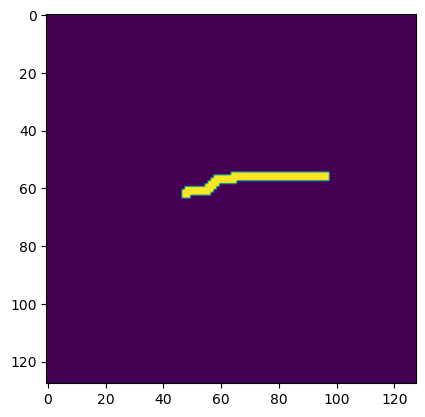

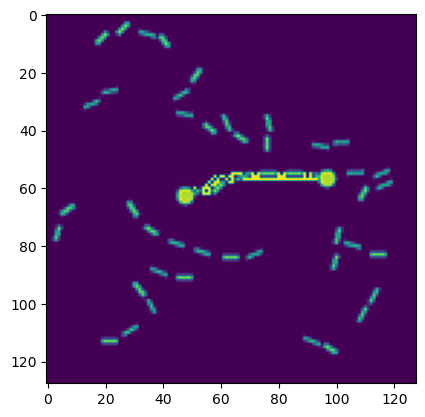

In [158]:
path_img = np.zeros_like(img_dilation1)
path_img[tuple(np.array(pad_path).T)] = 255
djik_img = img_dilation1 + path_img
djik_img2 = img + path_img
plt.imshow(path_img)
plt.figure()
plt.imshow(djik_img2)




In [127]:
traversal1 = bfs1(adj_dict, anchors[0])
traversal1

[(56, 96),
 (55, 96),
 (57, 96),
 (56, 95),
 (56, 97),
 (55, 95),
 (55, 97),
 (57, 97),
 (57, 95),
 (54, 96),
 (54, 95),
 (54, 97),
 (58, 96),
 (58, 97),
 (58, 95),
 (56, 94),
 (55, 94),
 (57, 94),
 (56, 98),
 (55, 98),
 (57, 98),
 (54, 94),
 (54, 98),
 (58, 98),
 (58, 94),
 (53, 96),
 (53, 95),
 (53, 97),
 (53, 94),
 (53, 98),
 (59, 96),
 (59, 97),
 (59, 95),
 (59, 98),
 (59, 94),
 (56, 93),
 (55, 93),
 (57, 93),
 (54, 93),
 (58, 93),
 (56, 99),
 (55, 99),
 (57, 99),
 (54, 99),
 (58, 99),
 (53, 93),
 (53, 99),
 (59, 99),
 (59, 93),
 (52, 96),
 (52, 95),
 (52, 97),
 (52, 98),
 (52, 99),
 (60, 96),
 (60, 97),
 (60, 95),
 (60, 98),
 (60, 94),
 (60, 99),
 (60, 93),
 (56, 92),
 (55, 92),
 (57, 92),
 (58, 92),
 (59, 92),
 (56, 100),
 (55, 100),
 (57, 100),
 (54, 100),
 (58, 100),
 (53, 100),
 (59, 100),
 (60, 100),
 (61, 96),
 (61, 97),
 (61, 95),
 (61, 98),
 (61, 94),
 (61, 99),
 (61, 93),
 (61, 100),
 (56, 91),
 (55, 91),
 (57, 91),
 (56, 101),
 (55, 101),
 (57, 101),
 (54, 101),
 (58, 10

In [128]:
d

{(56, 96): 0,
 (55, 96): 1,
 (57, 96): 1,
 (56, 95): 1,
 (56, 97): 1,
 (55, 95): 1,
 (55, 97): 1,
 (57, 97): 1,
 (57, 95): 1,
 (54, 95): 2,
 (55, 94): 2,
 (54, 94): 2,
 (54, 96): 2,
 (56, 94): 2,
 (54, 97): 2,
 (55, 98): 2,
 (54, 98): 2,
 (56, 98): 2,
 (57, 94): 2,
 (57, 98): 2,
 (58, 95): 2,
 (58, 96): 2,
 (58, 94): 2,
 (58, 97): 2,
 (58, 98): 2,
 (53, 94): 3,
 (54, 93): 3,
 (53, 95): 3,
 (53, 93): 3,
 (55, 93): 3,
 (53, 96): 3,
 (53, 97): 3,
 (53, 98): 3,
 (54, 99): 3,
 (53, 99): 3,
 (55, 99): 3,
 (56, 93): 3,
 (56, 99): 3,
 (57, 93): 3,
 (57, 99): 3,
 (58, 93): 3,
 (58, 99): 3,
 (59, 94): 3,
 (59, 95): 3,
 (59, 93): 3,
 (59, 96): 3,
 (59, 97): 3,
 (59, 98): 3,
 (59, 99): 3,
 (52, 95): 4,
 (52, 96): 4,
 (52, 97): 4,
 (52, 98): 4,
 (52, 99): 4,
 (53, 100): 4,
 (54, 100): 4,
 (55, 92): 4,
 (55, 100): 4,
 (56, 92): 4,
 (56, 100): 4,
 (57, 92): 4,
 (57, 100): 4,
 (58, 92): 4,
 (58, 100): 4,
 (59, 92): 4,
 (59, 100): 4,
 (60, 93): 4,
 (60, 94): 4,
 (60, 95): 4,
 (60, 96): 4,
 (60, 97): 4,

In [120]:
path(anchors[0], parent)

[(56, 96)]

In [123]:
def printPath(parent, j, l):
    # Returns a list from destination to source
    # Base case when j = source
    if parent[j] == -1:
       return l
    else:
       l.append(j)
       return printPath(parent, parent[j], l)  
    
def printSolution(anchors, dist, parent):
    src = anchors[0]
    print("Vertex \t\tDistance from Source\tPath")
    
    for i in range(1, len(dist)):
        st = f"\n{src}  --> {i}\t\t{dist[i]}\t\t\t\t\t{printPath(parent,i,[])[::-1]}"
        #print(("\n%d --> %d \t\t%d \t\t\t\t\t" % (src, i, dist[i])), end=' ')
        #self.printPath(parent, i)
        print(st)

print(d)
print(parent)
printSolution(anchors, d, parent)


{(56, 96): 0, (55, 96): 1, (57, 96): 1, (56, 95): 1, (56, 97): 1, (55, 95): 1, (55, 97): 1, (57, 97): 1, (57, 95): 1, (54, 95): 2, (55, 94): 2, (54, 94): 2, (54, 96): 2, (56, 94): 2, (54, 97): 2, (55, 98): 2, (54, 98): 2, (56, 98): 2, (57, 94): 2, (57, 98): 2, (58, 95): 2, (58, 96): 2, (58, 94): 2, (58, 97): 2, (58, 98): 2, (53, 94): 3, (54, 93): 3, (53, 95): 3, (53, 93): 3, (55, 93): 3, (53, 96): 3, (53, 97): 3, (53, 98): 3, (54, 99): 3, (53, 99): 3, (55, 99): 3, (56, 93): 3, (56, 99): 3, (57, 93): 3, (57, 99): 3, (58, 93): 3, (58, 99): 3, (59, 94): 3, (59, 95): 3, (59, 93): 3, (59, 96): 3, (59, 97): 3, (59, 98): 3, (59, 99): 3, (52, 95): 4, (52, 96): 4, (52, 97): 4, (52, 98): 4, (52, 99): 4, (53, 100): 4, (54, 100): 4, (55, 92): 4, (55, 100): 4, (56, 92): 4, (56, 100): 4, (57, 92): 4, (57, 100): 4, (58, 92): 4, (58, 100): 4, (59, 92): 4, (59, 100): 4, (60, 93): 4, (60, 94): 4, (60, 95): 4, (60, 96): 4, (60, 97): 4, (60, 98): 4, (60, 99): 4, (60, 100): 4, (53, 101): 5, (54, 101): 5, (

TypeError: printSolution() missing 1 required positional argument: 'parent'

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

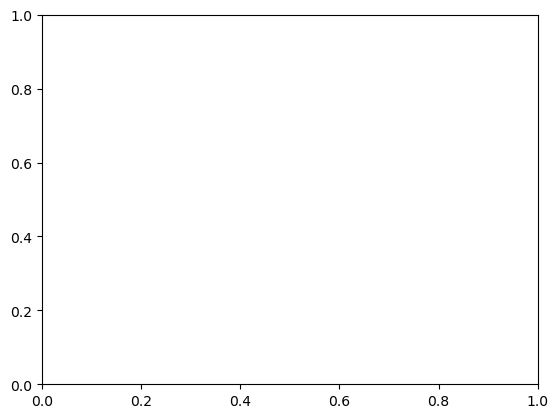

In [44]:
G_path = nx.from_edgelist(traversal1)
adj = [(n, nbrdict) for n, nbrdict in G_path.adjacency()]
adj_dict = {}
for el in adj:
    adj_dict[el[0]] = [key for key in el[1].keys()]
pos = dict(zip(G_path.nodes(), G_path.nodes())) # map node names to coordinates
nx.draw_networkx(G_path, pos, with_labels=False, node_size=0)
labels={node: f'({node[0]},{node[1]})' for node in G_path.nodes()}
nx.draw_networkx_labels(G_path, pos, labels, font_size=6, font_family='serif', font_weight='bold', bbox = dict(fc='lightblue', ec="black", boxstyle="round", lw=1))
plt.show()

dijkstra(adj_dict, (0,0), (9,9))